In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.tree import DecisionTreeClassifier
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
df = pd.read_csv('airline_passenger_satisfaction.csv')

In [3]:
df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [4]:
df.isnull().sum()

In [5]:
df.shape

(129880, 24)

## Предобработка данных.

In [6]:
data = df.dropna(axis=1, how='any')

In [7]:
data.isnull().sum()

In [8]:
#Кодирование категориальных признаков
LE = LabelEncoder()
for column in ["Gender","Customer Type", "Type of Travel", "Class", "Satisfaction"]:
    data[column] = LE.fit_transform(data[column])

<ipython-input-8-ed2ecd59760f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = LE.fit_transform(data[column])


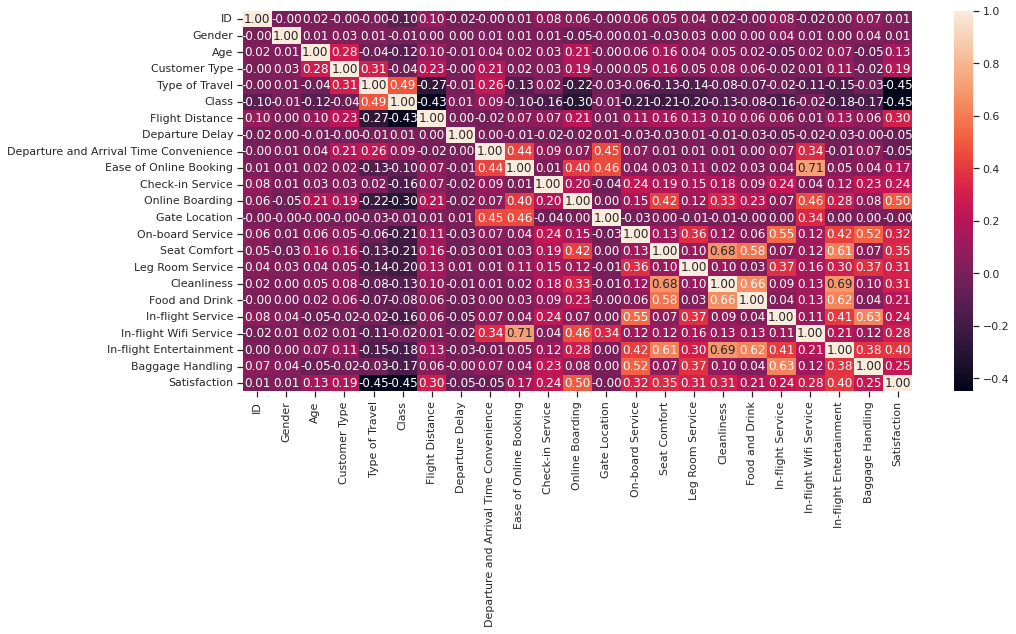

In [9]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [10]:
#Удаление ненужных столбцов
data = data.drop(columns=["Type of Travel", "Class", "Departure Delay", "Departure and Arrival Time Convenience", "Online Boarding", "Gate Location"], axis=1)

In [11]:
data.head()

,ID,Gender,Age,Customer Type,Flight Distance,Ease of Online Booking,Check-in Service,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,821,3,4,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,821,2,3,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,853,4,4,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,1905,2,3,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,3470,3,3,3,4,4,5,4,3,3,3,3,1


In [12]:
xArray = data.drop("Satisfaction", axis=1)
yArray = data["Satisfaction"]

In [13]:
data['Satisfaction'].unique()

In [14]:
#Разделяем выборку для обучения модели
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.15, random_state=1)

## Логистическая регрессия

In [15]:
logistic_model = LogisticRegression(C=0.01, penalty='l1', solver='liblinear', random_state=1)
logistic_model.fit(trainX, trainY)

LogisticRegression(C=0.01, penalty='l1', random_state=1, solver='liblinear')

In [16]:
y_test_predict = logistic_model.predict(testX)
y_test_predict

In [17]:
pred_y_test_proba = logistic_model.predict_proba(testX)
pred_y_test_proba[:10]

In [18]:
print("Accuracy:  ",accuracy_score(testY, y_test_predict))
print("Precision: ",precision_score(testY, y_test_predict))
print("Recall:    ",recall_score(testY, y_test_predict))

Accuracy:   0.7765116517811314
Precision:  0.7607734108429167
Recall:     0.7098219549581417


## Метод опорных векторов

In [19]:
data_svm=data

In [20]:
data.head()

,ID,Gender,Age,Customer Type,Flight Distance,Ease of Online Booking,Check-in Service,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,1,48,0,821,3,4,3,5,2,5,5,5,3,5,5,0
1,2,0,35,1,821,2,3,5,4,5,5,3,5,2,5,5,1
2,3,1,41,1,853,4,4,3,5,3,5,5,3,4,3,3,1
3,4,1,50,1,1905,2,3,5,5,5,4,4,5,2,5,5,1
4,5,0,49,1,3470,3,3,3,4,4,5,4,3,3,3,3,1


In [21]:
data_x_columns = ['Gender', 'Age', 'Customer Type', 'Flight Distance', 'Ease of Online Booking', 'Check-in Service', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Satisfaction']

In [22]:
# Масштабирование данных в диапазоне от 0 до 1
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_svm[data_x_columns])

In [25]:
sc1_data = DataFrame(sc1_data)
sc1_data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.525641,0.0,0.159532,0.6,0.8,0.6,1.0,0.4,1.0,1.0,1.0,0.6,1.0,1.00,0.0
1,0.0,0.358974,1.0,0.159532,0.4,0.6,1.0,0.8,1.0,1.0,0.6,1.0,0.4,1.0,1.00,1.0
2,1.0,0.435897,1.0,0.165994,0.8,0.8,0.6,1.0,0.6,1.0,1.0,0.6,0.8,0.6,0.50,1.0
3,1.0,0.551282,1.0,0.378433,0.4,0.6,1.0,1.0,1.0,0.8,0.8,1.0,0.4,1.0,1.00,1.0
4,0.0,0.538462,1.0,0.694467,0.6,0.6,0.6,0.8,0.8,1.0,0.8,0.6,0.6,0.6,0.50,1.0
5,1.0,0.461538,1.0,0.758683,0.8,0.6,0.8,0.8,0.8,0.6,0.6,0.8,0.8,0.8,0.75,1.0
6,1.0,0.461538,1.0,0.390145,0.6,0.8,1.0,1.0,1.0,0.8,1.0,1.0,0.6,1.0,1.00,1.0
7,0.0,0.679487,1.0,0.165994,0.8,0.6,0.6,0.8,0.8,0.8,0.8,0.6,0.8,0.6,0.50,1.0
8,1.0,0.551282,1.0,0.520194,0.2,0.6,0.8,0.6,0.8,0.6,0.6,0.8,0.8,0.8,0.75,0.0
9,0.0,0.397436,1.0,0.563611,1.0,0.6,1.0,0.8,1.0,0.8,0.4,1.0,0.4,1.0,1.00,1.0


In [26]:
x_Array = sc1_data.drop(15, axis=1)
y_Array = sc1_data[15]

In [27]:
#Разделяем выборку для обучения модели
train_X, test_X, train_Y, test_Y = train_test_split(x_Array, y_Array, test_size=0.15, random_state=1)

In [28]:
clf = SVC(kernel='linear', C = 0.1, probability=True)
clf.fit(train_X,train_Y)

SVC(C=0.1, kernel='linear', probability=True)

In [39]:
y_test_predict_svc = clf.predict(test_X)
y_test_predict_svc

In [41]:
print("Accuracy:  ",accuracy_score(test_Y, y_test_predict_svc))
print("Precision: ",precision_score(test_Y, y_test_predict_svc))
print("Recall:    ",recall_score(test_Y, y_test_predict_svc))

Accuracy:   0.7767682989426137
Precision:  0.7681723779854621
Recall:     0.6977950713359273


## Деревья решений

In [21]:
x__Array = data.drop("Satisfaction", axis=1)
y__Array = data["Satisfaction"]

In [22]:
#Разделяем выборку для обучения модели
train__X, test__X, train__Y, test__Y = train_test_split(x__Array, y__Array, test_size=0.15, random_state=1)

In [23]:
model_tree = DecisionTreeClassifier(max_depth=5, random_state=1, splitter='random')
model_tree.fit(train__X,train__Y)

DecisionTreeClassifier(max_depth=5, random_state=1, splitter='random')

In [25]:
y_predict_tree = model_tree.predict(test__X)
y_predict_tree

In [26]:
print("Accuracy:  ",accuracy_score(test__Y, y_predict_tree))
print("Precision: ",precision_score(test__Y, y_predict_tree))
print("Recall:    ",recall_score(test__Y, y_predict_tree))

Accuracy:   0.8189610922903192
Precision:  0.8480888139404159
Recall:     0.7115906143143497


## График, показывающий важность признаков в дереве решений

In [27]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(20,9)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

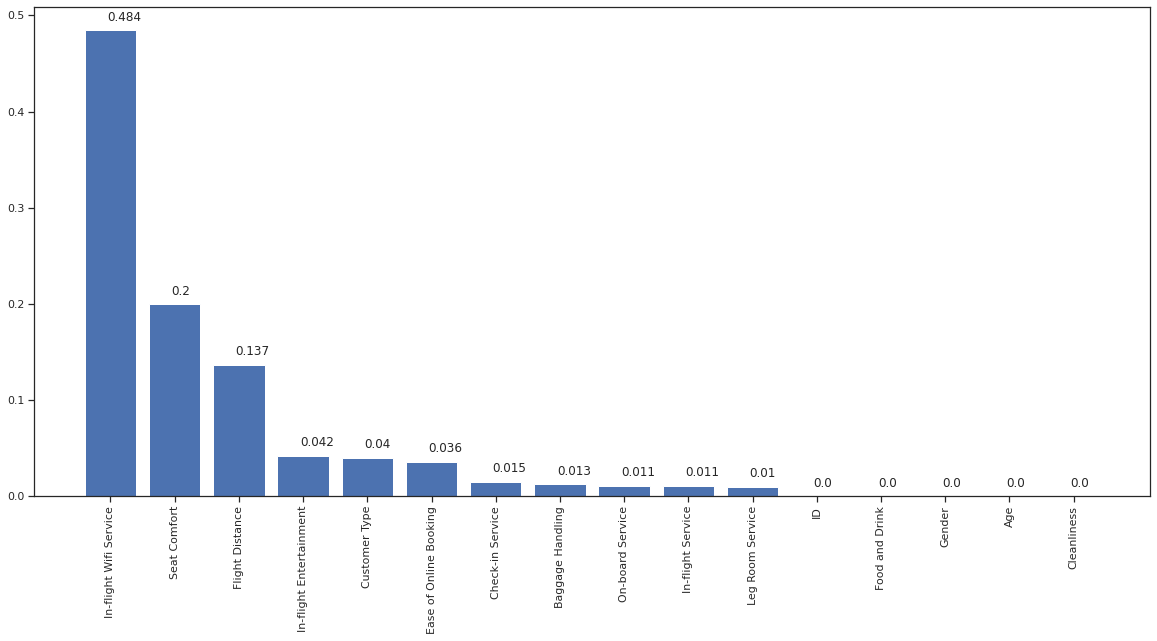

In [28]:
diagram, _ = draw_feature_importances(model_tree, data)

## Дерево решений в текстовом виде

In [30]:
feature_names=(list(x__Array.columns))
target_names =str(list(data['Satisfaction'].unique()))
#target = list(df['Class Name'].unique())

In [31]:
from sklearn.tree import export_text
r = export_text(model_tree, feature_names=feature_names)
print(r)

|--- In-flight Wifi Service <= 3.36
|   |--- Seat Comfort <= 3.33
|   |   |--- Ease of Online Booking <= 0.04
|   |   |   |--- In-flight Wifi Service <= 0.53
|   |   |   |   |--- class: 1
|   |   |   |--- In-flight Wifi Service >  0.53
|   |   |   |   |--- class: 0
|   |   |--- Ease of Online Booking >  0.04
|   |   |   |--- Leg Room Service <= 3.80
|   |   |   |   |--- Check-in Service <= 4.36
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Check-in Service >  4.36
|   |   |   |   |   |--- class: 0
|   |   |   |--- Leg Room Service >  3.80
|   |   |   |   |--- In-flight Entertainment <= 3.01
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- In-flight Entertainment >  3.01
|   |   |   |   |   |--- class: 1
|   |--- Seat Comfort >  3.33
|   |   |--- Flight Distance <= 1843.80
|   |   |   |--- In-flight Wifi Service <= 0.04
|   |   |   |   |--- Ease of Online Booking <= 3.32
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Ease of Online Booking >  3.32
|   |   |   |   